In [70]:
import math
import numpy as np
import pandas as pd
from scipy import stats

from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare

In [2]:
df = acquire.get_zillow_data()
df.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,yearbuilt,taxvaluedollarcnt,taxamount
0,11721753,2.0,3.0,1316.0,6037.0,1923.0,205123.0,2627.48
1,11289917,2.0,3.0,1458.0,6037.0,1970.0,136104.0,2319.90
2,11705026,1.0,2.0,1421.0,6037.0,1911.0,35606.0,543.69
3,14269464,3.0,4.0,2541.0,6059.0,2003.0,880456.0,9819.72
4,11446756,2.0,3.0,1491.0,6037.0,1955.0,107110.0,1399.27


In [3]:
df.shape

(28185, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28185 entries, 0 to 28184
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      28185 non-null  int64  
 1   bathroomcnt                   28185 non-null  float64
 2   bedroomcnt                    28185 non-null  float64
 3   calculatedfinishedsquarefeet  28117 non-null  float64
 4   fips                          28185 non-null  float64
 5   yearbuilt                     28093 non-null  float64
 6   taxvaluedollarcnt             28184 non-null  float64
 7   taxamount                     28184 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.9 MB


In [5]:
# check for number of unique values in each column
df.nunique()

parcelid                        28160
bathroomcnt                        20
bedroomcnt                         13
calculatedfinishedsquarefeet     4056
fips                                3
yearbuilt                         131
taxvaluedollarcnt               22786
taxamount                       27719
dtype: int64

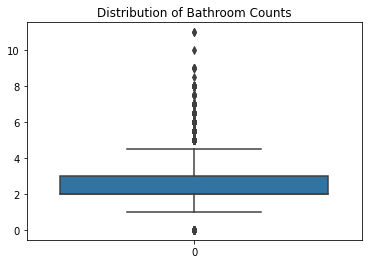

In [6]:
# quick viz of bathroomcnt
sns.boxplot(data=df.bathroomcnt)
plt.title('Distribution of Bathroom Counts')
plt.show()

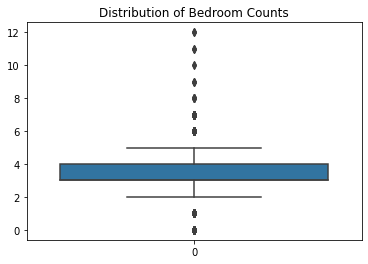

In [7]:
# quick viz of bedroomcnt
sns.boxplot(data=df.bedroomcnt)
plt.title('Distribution of Bedroom Counts')
plt.show()

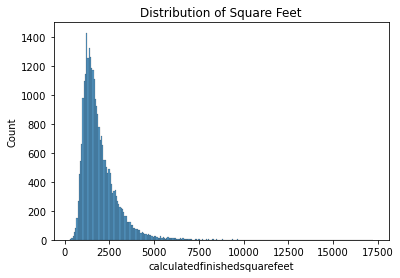

In [8]:
# quick viz of calculatedfinishedsquarefeet
sns.histplot(data=df.calculatedfinishedsquarefeet)
plt.title('Distribution of Square Feet')
plt.show()

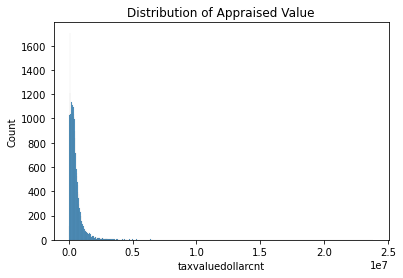

In [9]:
# quick viz of taxvaluedollarcnt
sns.histplot(data=df.taxvaluedollarcnt)
plt.title('Distribution of Appraised Value')
plt.show()

In [10]:
prepare.miss_dup_values(df)

Your selected dataframe has 8 columns.
There are 4 columns that have missing values.
  
** There are 25 duplicate rows that represents 0.09% of total Values**


,Missing Values,% of Total Values
yearbuilt,92,0.3
calculatedfinishedsquarefeet,68,0.2
taxvaluedollarcnt,1,0.0
taxamount,1,0.0


In [11]:
# drop any duplicates (removed 25 records)
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28160 entries, 0 to 28184
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      28160 non-null  int64  
 1   bathroomcnt                   28160 non-null  float64
 2   bedroomcnt                    28160 non-null  float64
 3   calculatedfinishedsquarefeet  28094 non-null  float64
 4   fips                          28160 non-null  float64
 5   yearbuilt                     28070 non-null  float64
 6   taxvaluedollarcnt             28159 non-null  float64
 7   taxamount                     28159 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.9 MB


In [12]:
# replace symbols, etc with NaN's
df = df.replace(r'^\s*$', np.nan, regex=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28160 entries, 0 to 28184
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      28160 non-null  int64  
 1   bathroomcnt                   28160 non-null  float64
 2   bedroomcnt                    28160 non-null  float64
 3   calculatedfinishedsquarefeet  28094 non-null  float64
 4   fips                          28160 non-null  float64
 5   yearbuilt                     28070 non-null  float64
 6   taxvaluedollarcnt             28159 non-null  float64
 7   taxamount                     28159 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.9 MB


In [13]:
# drop nulls (removed 95 records)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28065 entries, 0 to 28184
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      28065 non-null  int64  
 1   bathroomcnt                   28065 non-null  float64
 2   bedroomcnt                    28065 non-null  float64
 3   calculatedfinishedsquarefeet  28065 non-null  float64
 4   fips                          28065 non-null  float64
 5   yearbuilt                     28065 non-null  float64
 6   taxvaluedollarcnt             28065 non-null  float64
 7   taxamount                     28065 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.9 MB


In [14]:
prepare.miss_dup_values(df)

Your selected dataframe has 8 columns.
There are 0 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values


In [15]:
# set index to parcelid
df.set_index('parcelid', drop=True, inplace=True)
df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,yearbuilt,taxvaluedollarcnt,taxamount
parcelid,,,,,,,
11721753,2.0,3.0,1316.0,6037.0,1923.0,205123.0,2627.48
11289917,2.0,3.0,1458.0,6037.0,1970.0,136104.0,2319.90
11705026,1.0,2.0,1421.0,6037.0,1911.0,35606.0,543.69
14269464,3.0,4.0,2541.0,6059.0,2003.0,880456.0,9819.72
11446756,2.0,3.0,1491.0,6037.0,1955.0,107110.0,1399.27


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28065 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   28065 non-null  float64
 1   bedroomcnt                    28065 non-null  float64
 2   calculatedfinishedsquarefeet  28065 non-null  float64
 3   fips                          28065 non-null  float64
 4   yearbuilt                     28065 non-null  float64
 5   taxvaluedollarcnt             28065 non-null  float64
 6   taxamount                     28065 non-null  float64
dtypes: float64(7)
memory usage: 1.7 MB


In [17]:
# rename columns
df = df.rename(columns={'parcelid': 'parcel_id', 'bathroomcnt': 'bathrooms', 'bedroomcnt': 'bedrooms',
                       'calculatedfinishedsquarefeet': 'square_feet', 'fips': 'county_code',
                       'yearbuilt': 'age', 'taxvaluedollarcnt': 'appraised_value', 'taxamount': 'taxes'})

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28065 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        28065 non-null  float64
 1   bedrooms         28065 non-null  float64
 2   square_feet      28065 non-null  float64
 3   county_code      28065 non-null  float64
 4   age              28065 non-null  float64
 5   appraised_value  28065 non-null  float64
 6   taxes            28065 non-null  float64
dtypes: float64(7)
memory usage: 1.7 MB


In [19]:
# convert year built into age, age is better for evaluation
df.age = 2017 - df.age

In [20]:
df.head()

,bathrooms,bedrooms,square_feet,county_code,age,appraised_value,taxes
parcelid,,,,,,,
11721753,2.0,3.0,1316.0,6037.0,94.0,205123.0,2627.48
11289917,2.0,3.0,1458.0,6037.0,47.0,136104.0,2319.90
11705026,1.0,2.0,1421.0,6037.0,106.0,35606.0,543.69
14269464,3.0,4.0,2541.0,6059.0,14.0,880456.0,9819.72
11446756,2.0,3.0,1491.0,6037.0,62.0,107110.0,1399.27


In [21]:
# change data types from float to int
df.bathrooms = df.bathrooms.astype('int')
df.bedrooms = df.bedrooms.astype('int')
df.square_feet = df.square_feet.astype('int')
df.county_code = df.county_code.astype('int')
df.age = df.age.astype('int')
df.appraised_value = df.appraised_value.astype('int')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28065 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        28065 non-null  int64  
 1   bedrooms         28065 non-null  int64  
 2   square_feet      28065 non-null  int64  
 3   county_code      28065 non-null  int64  
 4   age              28065 non-null  int64  
 5   appraised_value  28065 non-null  int64  
 6   taxes            28065 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 1.7 MB


In [23]:
df.square_feet.describe()

count    28065.000000
mean      1933.860289
std        992.752940
min        240.000000
25%       1279.000000
50%       1674.000000
75%       2325.000000
max      17245.000000
Name: square_feet, dtype: float64

In [24]:
# remove outliers from square_feet
# calculate 1QR and 3QR
q1sf, q3sf = df.square_feet.quantile([0.25, 0.75])
q1sf, q3sf

(1279.0, 2325.0)

In [25]:
# calculate IQR
iqrsf = q3sf - q1sf
iqrsf

1046.0

In [26]:
# calculate upper and lower bounds
uppersf = q3sf + (1.5 * iqrsf)
lowersf = q1sf - (1.5 * iqrsf)
uppersf, lowersf

(3894.0, -290.0)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28065 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        28065 non-null  int64  
 1   bedrooms         28065 non-null  int64  
 2   square_feet      28065 non-null  int64  
 3   county_code      28065 non-null  int64  
 4   age              28065 non-null  int64  
 5   appraised_value  28065 non-null  int64  
 6   taxes            28065 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 1.7 MB


In [28]:
# remove outliers if below or above the bounds (removed 1194 records)
df = df[df.square_feet > lowersf]
df = df[df.square_feet < uppersf]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26871 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        26871 non-null  int64  
 1   bedrooms         26871 non-null  int64  
 2   square_feet      26871 non-null  int64  
 3   county_code      26871 non-null  int64  
 4   age              26871 non-null  int64  
 5   appraised_value  26871 non-null  int64  
 6   taxes            26871 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 1.6 MB


In [30]:
# remove outliers from appraised_value
# calculate 1QR and 3QR
q1av, q3av = df.appraised_value.quantile([0.25, 0.75])
q1av, q3av

(190984.5, 588496.0)

In [31]:
# calculate IQR
iqrav = q3av - q1av
iqrav

397511.5

In [32]:
# calculate upper and lower bounds
upperav = q3av + (1.5 * iqrav)
lowerav = q1av - (1.5 * iqrav)
upperav, lowerav

(1184763.25, -405282.75)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26871 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        26871 non-null  int64  
 1   bedrooms         26871 non-null  int64  
 2   square_feet      26871 non-null  int64  
 3   county_code      26871 non-null  int64  
 4   age              26871 non-null  int64  
 5   appraised_value  26871 non-null  int64  
 6   taxes            26871 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 1.6 MB


In [34]:
# remove outliers if below or above the bounds (removed 1226 records)
df = df[df.appraised_value > lowerav]
df = df[df.appraised_value < upperav]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25545 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        25545 non-null  int64  
 1   bedrooms         25545 non-null  int64  
 2   square_feet      25545 non-null  int64  
 3   county_code      25545 non-null  int64  
 4   age              25545 non-null  int64  
 5   appraised_value  25545 non-null  int64  
 6   taxes            25545 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 1.6 MB


In [36]:
# remove outliers from bathrooms
# calculate 1QR and 3QR
q1bth, q3bth = df.bathrooms.quantile([0.25, 0.75])
q1bth, q3bth

(2.0, 3.0)

In [37]:
# calculate IQR
iqrbth = q3bth - q1bth
iqrbth

1.0

In [38]:
# calculate upper and lower bounds
upperbth = q3bth + (1.5 * iqrbth)
lowerbth = q1bth - (1.5 * iqrbth)
upperbth, lowerbth

(4.5, 0.5)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25545 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        25545 non-null  int64  
 1   bedrooms         25545 non-null  int64  
 2   square_feet      25545 non-null  int64  
 3   county_code      25545 non-null  int64  
 4   age              25545 non-null  int64  
 5   appraised_value  25545 non-null  int64  
 6   taxes            25545 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 1.6 MB


In [40]:
# remove outliers if below or above the bounds (removed 143 records)
df = df[df.bathrooms > lowerbth]
df = df[df.bathrooms < upperbth]

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25402 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        25402 non-null  int64  
 1   bedrooms         25402 non-null  int64  
 2   square_feet      25402 non-null  int64  
 3   county_code      25402 non-null  int64  
 4   age              25402 non-null  int64  
 5   appraised_value  25402 non-null  int64  
 6   taxes            25402 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 1.6 MB


In [42]:
# remove outliers from bedrooms
# calculate 1QR and 3QR
q1bd, q3bd = df.bedrooms.quantile([0.25, 0.75])
q1bd, q3bd

(3.0, 4.0)

In [43]:
# calculate IQR
iqrbd = q3bd - q1bd
iqrbd

1.0

In [44]:
# calculate upper and lower bounds
upperbd = q3bd + (1.5 * iqrbd)
lowerbd = q1bd - (1.5 * iqrbd)
upperbd, lowerbd

(5.5, 1.5)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25402 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        25402 non-null  int64  
 1   bedrooms         25402 non-null  int64  
 2   square_feet      25402 non-null  int64  
 3   county_code      25402 non-null  int64  
 4   age              25402 non-null  int64  
 5   appraised_value  25402 non-null  int64  
 6   taxes            25402 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 1.6 MB


In [46]:
# remove outliers if below or above the bounds (removed 487 records)
df = df[df.bedrooms > lowerbd]
df = df[df.bedrooms < upperbd]

In [47]:
# last check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24915 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        24915 non-null  int64  
 1   bedrooms         24915 non-null  int64  
 2   square_feet      24915 non-null  int64  
 3   county_code      24915 non-null  int64  
 4   age              24915 non-null  int64  
 5   appraised_value  24915 non-null  int64  
 6   taxes            24915 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 1.5 MB


In [48]:
# going to drop columns not needed for project goals
mvp_df = df.drop(columns=['county_code', 'taxes'])
mvp_df.head()

,bathrooms,bedrooms,square_feet,age,appraised_value
parcelid,,,,,
11721753,2,3,1316,94,205123
11289917,2,3,1458,47,136104
11705026,1,2,1421,106,35606
14269464,3,4,2541,14,880456
11446756,2,3,1491,62,107110


In [49]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.split_zillow(mvp_df, 'appraised_value')
train.shape, validate.shape, test.shape

((13952, 5), (5980, 5), (4983, 5))

In [50]:
train.head()

,bathrooms,bedrooms,square_feet,age,appraised_value
parcelid,,,,,
11926939,2,3,1336,54,66643
14306594,3,4,2254,40,160918
12817643,3,3,3208,41,381923
11515617,3,3,2502,40,211710
13864627,2,3,1273,34,692407


In [51]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = prepare.Min_Max_Scaler(X_train, X_validate, X_test)
X_train_scaled.head()

,bathrooms,bedrooms,square_feet,age
parcelid,,,,
11926939,0.333333,0.333333,0.283708,0.384058
14306594,0.666667,0.666667,0.541573,0.282609
12817643,0.666667,0.333333,0.809551,0.289855
11515617,0.666667,0.333333,0.611236,0.282609
13864627,0.333333,0.333333,0.266011,0.239130


## Explore

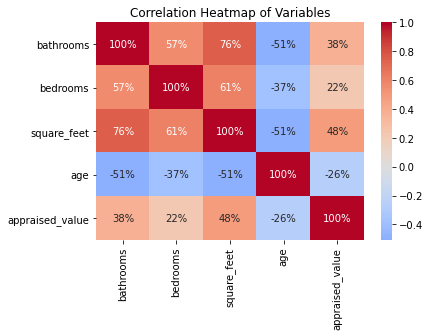

In [52]:
sns.heatmap(train.corr(), cmap='coolwarm', center=0, annot=True, fmt='.0%')

plt.title('Correlation Heatmap of Variables')
plt.show()

In [53]:
def plot_variable_pairs(train):
    '''
    This function will accept a dataframe as input 
    and plot all the pairwise relationships with the regression line for each pair
    '''
    sns.pairplot(train, kind = 'reg', corner=True,
                plot_kws = {'line_kws': {'color': 'crimson'}})

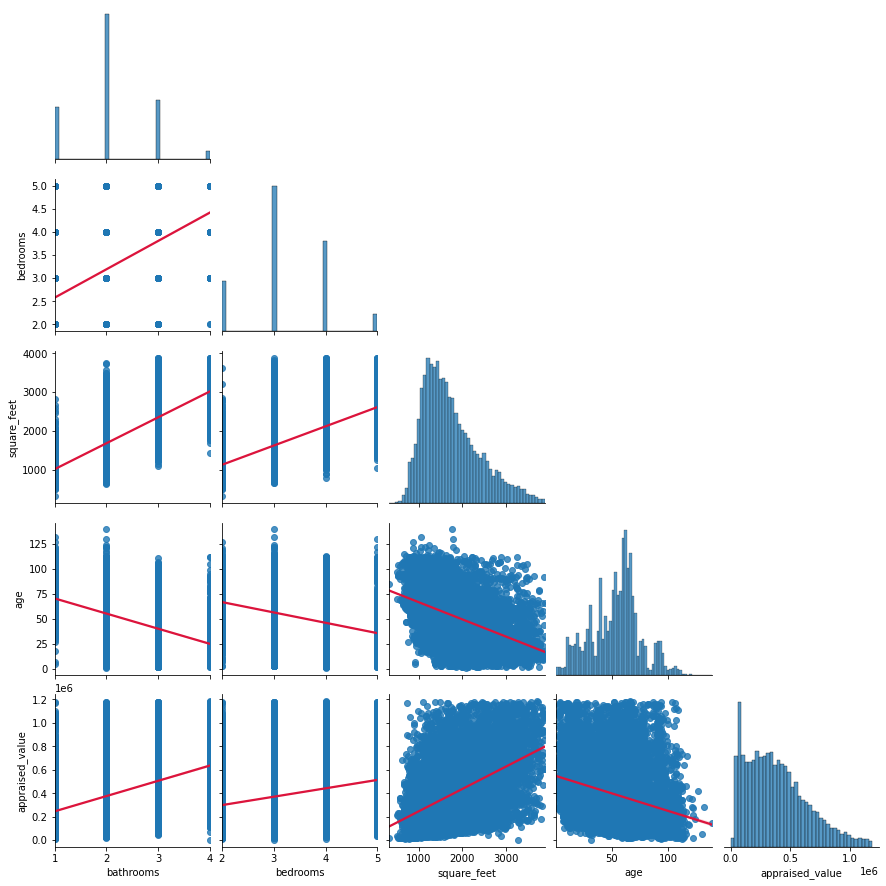

In [54]:
plot_variable_pairs(train)

#### Takeaways

### Statistical Testing

#### Correlation Test: Does the number of bathrooms affect the appraised value?

- The heatmap shows this category has a high positive correlation.

Form hypothesis:

- $H_0$ The number of bathrooms has no affect on the appraised value (independent)
- $H_a$ The number of bathrooms does have an affect on appraised value (dependent)

In [55]:
corr, p = stats.pearsonr(train.bathrooms, train.appraised_value)
print(corr, p)

# set alpha
alpha = 0.05

null_hypothesis = "the number of the bathrooms has no affect on the appraised value."

if p < alpha:
    print(f'\nWe can reject the null hypothesis that', null_hypothesis)
else:
    print(f'\nWe fail to reject the null hypothesis.')

0.37599735774229454 0.0

We can reject the null hypothesis that the number of the bathrooms has no affect on the appraised value.


#### T-Test: Does the square footage of the property affect the appraised value?

- The median value of square_feet is ~1600 sq.ft.
- The heatmap shows this category has a highest positive correlation.

Form hypothesis:

- $H_0$ The average appraised value of properties with 1600 sq.ft. or more is equal to the average appraised value of properties with 1600 sq.ft or less.
- $H_a$ The average appraised value of properties with 1600 sq.ft. or more is higher than the average appraised value of properties with 1600 sq.ft or less.

In [56]:
sqft_less_than_1600 = train[train.square_feet <= 1600]
sqft_more_than_1600 = train[train.square_feet > 1600]

a = sqft_less_than_1600.appraised_value.mean()
b = sqft_more_than_1600.appraised_value.mean()

t, p = stats.ttest_ind(sqft_more_than_1600.appraised_value,
                sqft_less_than_1600.appraised_value)
print(t, p)

null_hypothesis = "the average appraised value of properties with 1600 sq.ft. or more is equal to the average appraised value of properties with 1600 sq.ft or less."

if p < a:
    print(f'\nWe can reject the null hypothesis that', null_hypothesis)
else:
    print(f'\nWe fail to reject the null hypothesis.')

46.967598937311884 0.0

We can reject the null hypothesis that the average appraised value of properties with 1600 sq.ft. or more is equal to the average appraised value of properties with 1600 sq.ft or less.


## Modeling

#### Establish a baseline

In [57]:
y_train = pd.DataFrame({'actual': y_train})
y_train['baseline'] = y_train.actual.mean()
y_train.head()

,actual,baseline
parcelid,,
11926939,66643,387417.109733
14306594,160918,387417.109733
12817643,381923,387417.109733
11515617,211710,387417.109733
13864627,692407,387417.109733


In [73]:
print('Train RMSE Baseline model:')
print(math.sqrt(mean_squared_error(y_train.actual, y_train.baseline)))

Train RMSE Baseline model:
255578.63879967696


In [60]:
y_validate = pd.DataFrame({'actual': y_validate})
y_validate['baseline'] = y_train.actual.mean()
y_validate.head()

,actual,baseline
parcelid,,
14181729,523217,387417.109733
17108188,488207,387417.109733
14375729,395173,387417.109733
13848541,261074,387417.109733
12415982,105352,387417.109733


In [74]:
print('Validate RMSE baseline:')
print(math.sqrt(mean_squared_error(y_validate.actual, y_validate.baseline)))

Validate RMSE baseline:
259507.4931199972


#### Model1 - OLS (LinearRegression)

In [66]:
# create the model
model1 = LinearRegression(normalize=True)
# fit the model
model1.fit(X_train_scaled, y_train.actual)
# use the model to make predictions
y_train['model1'] = model1.predict(X_train_scaled)
y_validate['model1'] = model1.predict(X_validate_scaled)

print('Train RMSE for model1:')
print(math.sqrt(mean_squared_error(y_train.actual, y_train.model1)))

print('Validate RMSE model1:')
print(math.sqrt(mean_squared_error(y_validate.actual, y_validate.model1)))

Train RMSE for model1:
222161.05943080253
Validate RMSE model1:
225418.91502756294


#### Model2 - LassoLars

In [68]:
# create the model
model2 = LassoLars(alpha=1)
# fit the model
model2.fit(X_train_scaled, y_train.actual)
# use the model to make predictions
y_train['model2'] = model2.predict(X_train_scaled)
y_validate['model2'] = model2.predict(X_validate_scaled)

print('Train RMSE for model2:')
print(math.sqrt(mean_squared_error(y_train.actual, y_train.model2)))

print('Validate RMSE model2:')
print(math.sqrt(mean_squared_error(y_validate.actual, y_validate.model2)))

Train RMSE for model2:
222161.25213043648
Validate RMSE model2:
225417.4702013851


#### Model3 - TweedieRegressor (GLM)

In [71]:
# create the model
model3 = TweedieRegressor(power=1, alpha=0)
# fit the model
model3.fit(X_train_scaled, y_train.actual)
# use the model to make predictions
y_train['model3'] = model3.predict(X_train_scaled)
y_validate['model3'] = model3.predict(X_validate_scaled)

print('Train RMSE for model3:')
print(math.sqrt(mean_squared_error(y_train.actual, y_train.model3)))

print('Validate RMSE model3:')
print(math.sqrt(mean_squared_error(y_validate.actual, y_validate.model3)))

Train RMSE for model3:
222610.0931779301
Validate RMSE model3:
225334.60674407636


#### Model4 - Polynomial Regression

In [72]:
# make the polynomial features 
pf = PolynomialFeatures(degree=2)
# fit and transform X_train_scaled and X_validate_scaled
X_train_poly = pf.fit_transform(X_train_scaled)
X_validate_poly = pf.transform(X_validate_scaled)

## use LinearRegression ##
# create the model
model4 = LinearRegression(normalize=True)
# fit the model
model4.fit(X_train_poly, y_train.actual)
# use the model to make predictions
y_train['model4'] = model4.predict(X_train_poly)
y_validate['model4'] = model4.predict(X_validate_poly)

print('Train RMSE for model4:')
print(math.sqrt(mean_squared_error(y_train.actual, y_train.model4)))

print('Validate RMSE model4:')
print(math.sqrt(mean_squared_error(y_validate.actual, y_validate.model4)))

Train RMSE for model4:
221021.7141281593
Validate RMSE model4:
224154.31936100873


In [75]:
y_train.head()

,actual,baseline,model1,model2,model3,model4
parcelid,,,,,,
11926939,66643,387417.109733,312268.751345,312295.594468,314016.989395,300782.999680
14306594,160918,387417.109733,478180.857902,478143.263689,461387.921972,468426.530007
12817643,381923,387417.109733,711031.950269,710318.734807,760205.017426,678397.551650
11515617,211710,387417.109733,567889.628562,567366.772955,558229.031503,557988.526150
13864627,692407,387417.109733,303765.922742,303730.824512,310079.545664,283318.290186
